## Setup

In [2]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set this option to wrap wide columns
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', None)

### Load data

In [30]:
def fetch_data():
    response = requests.get("https://publicapi.traffy.in.th/share/teamchadchart/search?offset=0")
    print(response.json())
    print(response.json()["results"])
    print(len(response.json()["results"]))

In [93]:
# fetch_data()

{'status': True, 'total': 265766, 'results': [{'type': 'แสงสว่าง,สะพาน', 'org': 'กรุงเทพมหานคร', 'description': 'ช่วงที่ 7 ไฟฟ้าส่องสว่างบนเกาะกลางถนนถึงบนสะพานไม่ติดดับเป็นแนวยาวตลอดทั้งเส้น', 'ticket_id': '2023-MGCQX3', 'coords': ['100.68095', '13.75027'], 'photo_url': 'https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/77177fea4cff0df5281038672c38f895fcc90f67.jpg', 'after_photo': '', 'address': 'QM2H+7WH แขวงสะพานสูง เขตสะพานสูง กรุงเทพมหานคร 10240 ประเทศไทย', 'timestamp': '2023-04-22 14:05:11.583853+00', 'problem_type_abdul': ['แสงสว่าง', 'สะพาน'], 'star': None, 'count_reopen': '0', 'note': None, 'state': 'รอรับเรื่อง', 'last_activity': '2023-04-22 14:05:11.574244+00'}, {'type': '', 'org': 'กรุงเทพมหานคร', 'description': 'อยากให้ไฟสว่างกว่านี้ค่ะ ทั้งต้นซอยถึงกลางซอย ซอยอ่อนนุช68 คนทำงานเดินเข้าซอยดึกๆกันเยอะ มีคนบ้าคนเมาเยอะ เพราะซอยสามารถทะลุไปซอยอื่นได้', 'ticket_id': '2023-DEZDFE', 'coords': ['100.65003', '13.71430'], 'photo_url': 'https://storage.googleapis

In [30]:
bangkok_traffy = pd.read_csv("bangkok_traffy.csv", parse_dates=["timestamp", "last_activity"])

### Data Exploration

In [31]:
bangkok_traffy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258233 entries, 0 to 258232
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   ticket_id      255792 non-null  object             
 1   type           258136 non-null  object             
 2   organization   257254 non-null  object             
 3   comment        255792 non-null  object             
 4   photo          258139 non-null  object             
 5   photo_after    174416 non-null  object             
 6   coords         258233 non-null  object             
 7   address        255792 non-null  object             
 8   subdistrict    258163 non-null  object             
 9   district       258161 non-null  object             
 10  province       258210 non-null  object             
 11  timestamp      258233 non-null  datetime64[ns, UTC]
 12  state          258233 non-null  object             
 13  star           95539 non-null

In [32]:
bangkok_traffy[['address', 'district', 'province']].head(3)

,address,district,province
0,1867 จรัญสนิทวงศ์ แขวง บางพลัด เขตบางพลัด กรุงเทพมหานคร 10700 ประเทศไทย,บางพลัด,กรุงเทพมหานคร
1,12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบางซื่อ กรุงเทพมหานคร 10800 ประเทศไทย,NaN,กรุงเทพมหานคร
2,335/31 ลาดพร้าว แขวง สามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร 10310 ประเทศไทย,ห้วยขวาง,จังหวัดกรุงเทพมหานคร


In [33]:
finish_df = bangkok_traffy[bangkok_traffy.state == 'เสร็จสิ้น']
finish_df = finish_df.reset_index()

In [34]:
display(finish_df['organization'].nunique())

20667

In [35]:
finish_df.head(3)

,index,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,1,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_bucket/attachment/2021-09/3063e748259afbb7171467e19b92e9cc1f1a5826.jpg,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบางซื่อ กรุงเทพมหานคร 10800 ประเทศไทย,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00:00,เสร็จสิ้น,NaN,NaN,2022-06-04 15:34:14.609206+00:00
1,4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆปีจะมีเครื่องสูบน้ำแต่ปีนี้ไม่มีกทม.ปล่อยทิ้ง ชุมชนเคหะนคร1แปลง2(ซ.เฉลิมพระเกียรติร.9ซอง22 วัดตะกล่ำ ประเวศ),https://storage.googleapis.com/traffy_public_bucket/attachment/2021-09/41ef2b1b465b708db17363a6d5fd8c5336266df7.jpg,https://storage.googleapis.com/traffy_public_bucket/attachment/2022-06/b562e36f971f02221bd0f32b7272eb1ea516cacf.jpg,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเวศ กรุงเทพมหานคร 10250 ประเทศไทย,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00:00,เสร็จสิ้น,4.0,NaN,2022-06-21 08:21:09.532782+00:00
2,10,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_bucket/attachment/2021-09/b0b738c84fb0d0b0bfd5c5ac004492eb6fde19c3.jpg,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเทพมหานคร 10500 ประเทศไทย,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00:00,เสร็จสิ้น,NaN,NaN,2022-06-06 01:17:12.272904+00:00


In [36]:
finish_df.shape

(194146, 17)

## Data cleaning

In [37]:
finish_df.isna().sum()

index                0
ticket_id         1698
type                96
organization         1
comment           1698
photo               65
photo_after      25308
coords               0
address           1698
subdistrict         46
district            47
province             6
timestamp            0
state                0
star             99912
count_reopen     92913
last_activity        0
dtype: int64

In [38]:
finish_df.drop(columns=['index', 'ticket_id', 'photo', 'photo_after', 'star', 'count_reopen'], inplace=True)

In [39]:
finish_df.dropna(subset=['comment', 'subdistrict', 'district'], inplace=True)

In [40]:
finish_df.shape

(192401, 11)

In [41]:
finish_df.isna().sum()

type             96
organization      1
comment           0
coords            0
address           0
subdistrict       0
district          0
province          0
timestamp         0
state             0
last_activity     0
dtype: int64

### Fill missing values

In [42]:
## fill organization with district data
finish_df[finish_df.organization.isna()]

,type,organization,comment,coords,address,subdistrict,district,province,timestamp,state,last_activity
25,{},NaN,ทางม้าลายไม่สมบูรณ์ และมีรถจักรยานยนต์วิ่งบนทางเท้า,"100.52352,13.74524",719/1 ถนน บรรทัดทอง แขวง วังใหม่ เขตปทุมวัน กรุงเทพมหานคร 10330 ประเทศไทย,รองเมือง,ปทุมวัน,กรุงเทพมหานคร,2022-01-24 04:38:02.654793+00:00,เสร็จสิ้น,2022-02-22 15:12:36.295044+00:00


In [43]:
finish_df.loc[25, 'organization'] = 'เขต' + finish_df.loc[25, 'district']

In [44]:
from sklearn.impute import SimpleImputer

# impute type with '{}'
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='{}')
finish_df[['type']] = imp.fit_transform(finish_df[['type']])

In [45]:
finish_df.isna().sum()

type             0
organization     0
comment          0
coords           0
address          0
subdistrict      0
district         0
province         0
timestamp        0
state            0
last_activity    0
dtype: int64

### Processed datetime

In [46]:
def get_delta_hour(row):
    start = row.timestamp
    end = row.last_activity
    delta = (end - start).total_seconds()
    return delta / 3600


In [47]:
finish_df.loc[:, 'hour_spend'] = finish_df[['timestamp', 'last_activity']].apply(get_delta_hour, axis=1)
finish_df.tail()

,type,organization,comment,coords,address,subdistrict,district,province,timestamp,state,last_activity,hour_spend
194141,{ถนน},"เขตบางเขน,ฝ่ายรักษาความสะอาดฯ เขตบางเขน",ปัญหา : ประชาชนแจ้งว่าถนนใต้อุโมงค์ตรงอนุสาวรีย์ฝั่งขาออกที่จะไปสะพานใหม่ก่อนลงอุโมงค์มีหิน 15*15 เซนติเมตร น่าจะเกิดจากพื้นผิวถนนมันกระเทาะอยู่บนถนน ประชาชนเกรงว่ารถมอเตอร์ไซด์จะเกิดอุบัติเกตุได้ จึงอยากให้ตรวจสอบและแก้ไขด้วย\nจุดเกิดเหตุ : (สถานที่เกิดเหตุ/จุดสังเกตุ) อยู่ใต้อุโมงค์อนุสาวรีย์พิทักษ์รัฐธรรมนูญ (วงเวียนบางบางเขน)\nถนน : พหลโยธิน\nเขต : บางเขน\nแขวง : อนุสาวรีย์\n#1555,"100.59749,13.87694",พหลโยธิน อนุสาวรีย์ บางเขน กรุงเทพมหานคร : VHGW+QWV แขวงอนุสาวรีย์ เขตบางเขน กรุงเทพมหานคร 10220 ประเทศไทย,อนุสาวรีย์,บางเขน,จังหวัดกรุงเทพมหานคร,2023-04-21 09:27:22.239024+00:00,เสร็จสิ้น,2023-04-21 11:28:48.539133+00:00,2.023972
194142,{},เขตบางเขน,แท๊กซี่ไม่รับ ผดส,"100.60221,13.87190",109/19 เซ็นทรัลพลาซารามอินทรา ถนนรามอินทรา แขวงอนุสาวรีย์ เขตบางเขน กรุงเทพมหานคร 10220 แขวงอนุสาวรีย์ เขตบางเขน กรุงเทพมหานคร 10220 ประเทศไทย,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,2023-04-21 12:19:46.640659+00:00,เสร็จสิ้น,2023-04-21 12:21:29.320745+00:00,0.028522
194143,{สอบถาม},"เขตทวีวัฒนา,ฝ่ายเทศกิจ เขตทวีวัฒนา",ปัญหา : พบการเผาในพื้นที่ว่างเปล่าระหว่างหมู่บ้าน มีพฤติกรรมการเผาเป็นระยะ ๆ เช่น เดือนละ 1-2 ครั้งจะเผา ช่วงเวลา 18.00 น. การเผาดังกล่าวส่งกลิ่นควันและฝุ่นละอองรบกวนประชาชนบริเวณใกล้เคียง ขอให้เจ้าหน้าที่ลงพื้นที่ตรวจสอบและดำเนินการแก้ไขปัญหา\n//ประชาชนยินดีให้เจ้าหน้าที่ติดต่อกลับเพื่อสอบถามข้อมูลเพิ่มเติม//\nจุดเกิดเหตุ : ใกล้เคียงหมู่บ้านปัญจทรัพย์ พาร์คปิ่นเกล้า \nเขต : ทวีวัฒนา\nแขวง : ศาลาธรรมสพน์\n#1555,"100.35964,13.79959",ศาลาธรรมสพน์ ทวีวัฒนา กรุงเทพมหานคร ใกล้เคียงหมู่บ้านปัญจทรัพย์ พาร์คปิ่นเกล้า : 45 ซอย สาวิตรี แขวงศาลาธรรมสพน์ เขตทวีวัฒนา กรุงเทพมหานคร 10170 ประเทศไทย,ศาลาธรรมสพน์,ทวีวัฒนา,จังหวัดกรุงเทพมหานคร,2023-04-21 12:29:13.891829+00:00,เสร็จสิ้น,2023-04-21 12:46:09.332468+00:00,0.282067
194144,{เสียงรบกวน},เขตบางเขน,ปัญหา: ร้านลาบ อบต. รามอินทรา มีพฤติกรรมแสดงดนตรีสดเสียงดัง ตั้งแต่เวลา 20:00 - 24:00 น. ขอให้เจ้าหน้าที่เข้ามาจัดการและห้ามปราม\nสถานที่เกิดเหตุ: ร้านลาบ อบต. รามอินทรา ฝั่งตรงงข้าม รามอินทรา ซอย 5 แยก 15\nซอย: รามอินทรา ซอย 5 แยก 15\nเขต: บางเขน\n#1555,"100.61803,13.87384",รามอินทรา ซอย 5 รามอินทรา อนุสาวรีย์ บางเขน กรุงเทพมหานคร : 179 ซอย รามอินทรา 5 แขวงอนุสาวรีย์ เขตบางเขน กรุงเทพมหานคร 10220 ประเทศไทย,อนุสาวรีย์,บางเขน,จังหวัดกรุงเทพมหานคร,2023-04-21 15:11:50.643153+00:00,เสร็จสิ้น,2023-04-22 02:38:00.467536+00:00,11.436062
194145,{สายไฟ},เขตบางบอน,สายสื่อสารในหมู่บ้าน,"100.42183,13.68016",68/130 เอกชัย บางบอนเหนือ เขตบางบอน กรุงเทพมหานคร 10150 ประเทศไทย,คลองบางพราน,บางบอน,กรุงเทพมหานคร,2023-04-22 00:36:54.415708+00:00,เสร็จสิ้น,2023-04-22 00:57:47.645616+00:00,0.348119


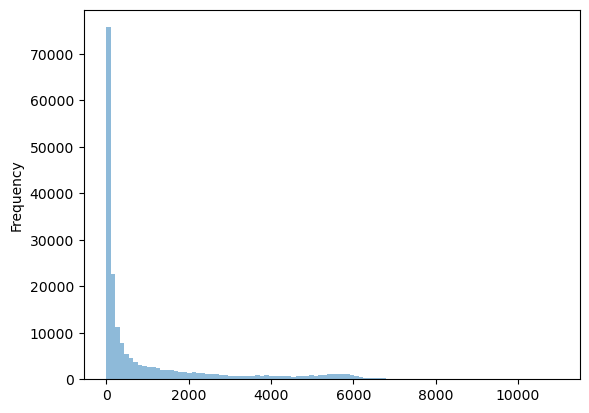

In [48]:
ax = finish_df['hour_spend'].plot.hist(bins=100, alpha=0.5)

In [49]:
df_2021 = finish_df[finish_df.timestamp.dt.year == 2021]
df_2022 = finish_df[finish_df.timestamp.dt.year == 2022]
df_2023 = finish_df[finish_df.timestamp.dt.year == 2023]

print("2021 data count:", df_2021.shape[0])
print("2022 data count:", df_2022.shape[0])
print("2023 data count:", df_2023.shape[0])

2021 data count: 10
2022 data count: 149246
2023 data count: 43145


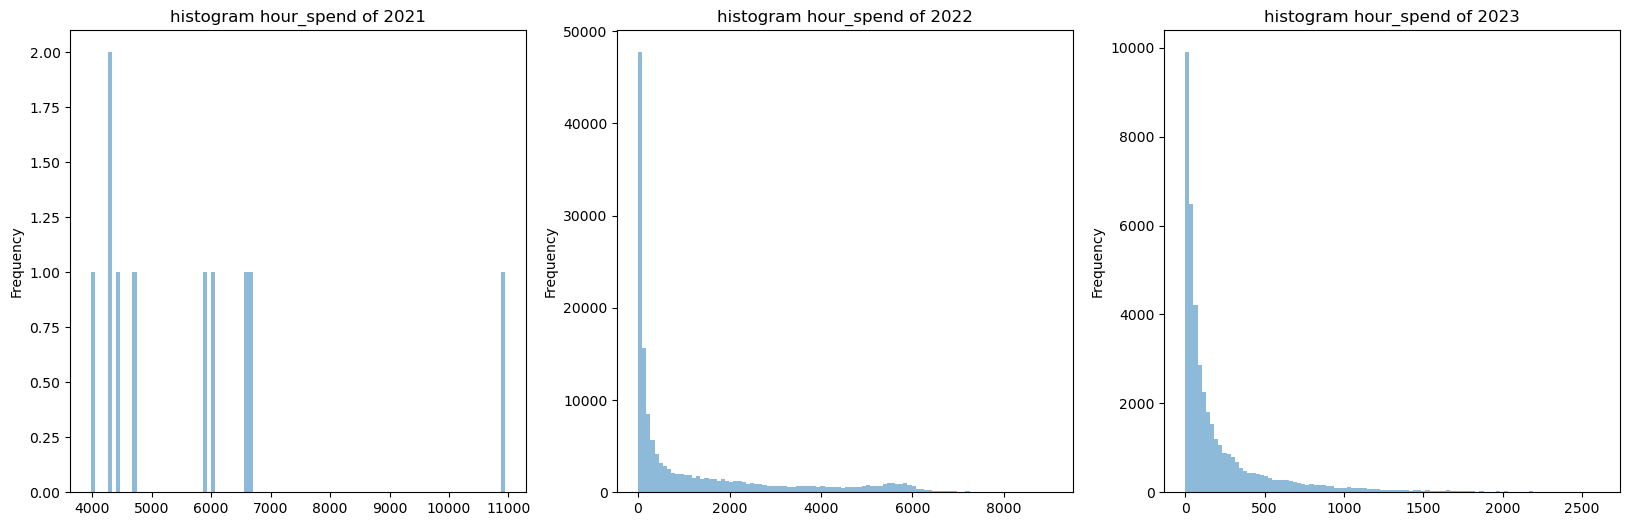

In [50]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title("histogram hour_spend of 2021")
ax1 = df_2021['hour_spend'].plot.hist(bins=100, alpha=0.5)
plt.subplot(1, 3, 2)
plt.title("histogram hour_spend of 2022")
ax2 = df_2022['hour_spend'].plot.hist(bins=100, alpha=0.5)
plt.subplot(1, 3, 3)
plt.title("histogram hour_spend of 2023")
ax3 = df_2023['hour_spend'].plot.hist(bins=100, alpha=0.5)

In [51]:
mask = (finish_df.timestamp.dt.year <= 2022) & (finish_df.timestamp.dt.month < 7)
before_chatchart = finish_df[mask]
after_chatchart = finish_df[~mask]

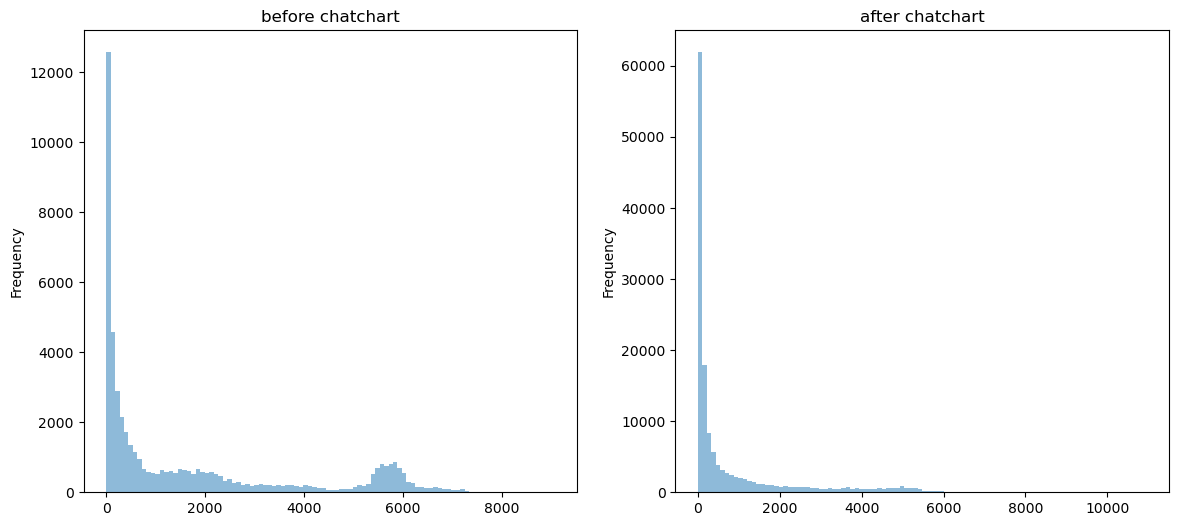

In [52]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("before chatchart")
ax1 = before_chatchart['hour_spend'].plot.hist(bins=100, alpha=0.5)
plt.subplot(1, 2, 2)
plt.title("after chatchart")
ax2 = after_chatchart['hour_spend'].plot.hist(bins=100, alpha=0.5)

In [53]:
clean_df = finish_df.drop(columns=['address', 'last_activity', 'state'])
clean_df.to_csv('cleaned_bangkok_traffy.csv')

## Training model

### Transform data

In [4]:
clean_df = pd.read_csv('cleaned_bangkok_traffy.csv', parse_dates=["timestamp"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192401 entries, 0 to 192400
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Unnamed: 0    192401 non-null  int64              
 1   type          192401 non-null  object             
 2   organization  192401 non-null  object             
 3   comment       192401 non-null  object             
 4   coords        192401 non-null  object             
 5   subdistrict   192401 non-null  object             
 6   district      192401 non-null  object             
 7   province      192401 non-null  object             
 8   timestamp     192401 non-null  datetime64[ns, UTC]
 9   hour_spend    192401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 14.7+ MB


In [5]:
mask = (clean_df.timestamp.dt.year <= 2022) & (clean_df.timestamp.dt.month < 7)
after_df = clean_df[~mask]

In [6]:
all_types = ['อื่นๆ', 'ถนน', 'ทางเท้า', 'แสงสว่าง', 'ความปลอดภัย', 'ความสะอาด', 'น้ำท่วม', 'กีดขวาง',
             'ท่อระบายน้ำ', 'จราจร', 'สะพาน', 'สายไฟ', 'เสียงรบกวน', 'คลอง', 'ต้นไม้', 'ร้องเรียน', 'ป้าย',
             'สัตว์จรจัด', 'สอบถาม', 'PM2.5', 'เสนอแนะ', 'คนจรจัด', 'การเดินทาง', 'ห้องน้ำ', 'ป้ายจราจร']
toi = {t:idx for idx, t in enumerate(all_types)}

In [7]:
X = []
y = []
for _, row in after_df[['type', 'hour_spend']].iterrows():
    type_vec = [0] * 25
    for t in row['type'].strip('{}').split(','):
        if t == '':
            type_vec[0] = 1
        else:
            type_vec[toi[t]] = 1
    X.append(type_vec)
    y.append(row['hour_spend'])
X = np.array(X)
y = np.array(y)

In [8]:
X[:3]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

### Tran test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [11]:
X_train.shape, X_test.shape

((112745, 25), (28187, 25))

### Model

In [12]:
from sklearn.ensemble import RandomForestRegressor

# tuning
from sklearn.model_selection import GridSearchCV

In [21]:
rf_params = {
    'criterion': "poisson",
    'max_depth': 20,
    'min_samples_leaf': 5,
    'n_estimators': 200,
    'random_state': 2020
}
regr = RandomForestRegressor(**rf_params, n_jobs=4)

In [22]:
regr.fit(X_train, y_train)
score = regr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.04535347326789152


### Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("R-squared:", score) 
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared: 0.044941002577688294
MSE:  1821705.5167155568
RMSE:  1349.7057148562262
